# Crossref Citation Cleaning Stats

## Data Provenance

The data was retrieved in September 2017 via the [Crossref API](http://api.crossref.org/works) (the download was interrupted and resumed a few times). (The raw responses LZMA zipped take about 28 GB disk space)

## Data Preprocessing

The data was then preprocessed to get calculate some high level stats over the data which are then analysed in this notebook.

The files are available here:
* [crossref-works-citations-stat.tsv](https://storage.googleapis.com/elife-ml/citations/crossref-works-citations-stat.tsv) - Stats relating to reference data quality and cleaning

## Scripts

The scripts can be found in [this repository](https://github.com/elifesciences/datacapsule-crossref), see [README](https://github.com/elifesciences/datacapsule-crossref/blob/analysis/README.md). Using those scripts the data can be updated (but it will take some time to retrieve all of the Crossref data).

In [1]:
%matplotlib inline

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [3]:
plt.style.use('ggplot')

In [4]:
data_path = '../data'
citations_stats_filename = 'crossref-works-citations-stat.tsv'

In [5]:
df_citations = pd.read_csv(os.path.join(data_path, citations_stats_filename), sep='\t')
df_citations = df_citations.rename(columns={'Unnamed: 0': 'stat'}).set_index('stat')
boolean_str_to_int_map = {'True': '1', 'False': '0'}
print(df_citations['cited_doi_corrected']
    .map(lambda x: boolean_str_to_int_map.get(x, x)).values)
df_citations['cited_doi_corrected'] = pd.to_numeric(
    df_citations['cited_doi_corrected']
    .map(lambda x: boolean_str_to_int_map.get(x, x))
)
print(df_citations.dtypes)
df_citations

['357115084' '76562655' '280552429' '1' '0' '76562655']
citing_doi                             float64
cited_doi                              float64
original_cited_doi                     float64
cited_doi_valid                        float64
cited_doi_corrected                      int64
doi_corrected_equal_case_insensitve    float64
dtype: object


,citing_doi,cited_doi,original_cited_doi,cited_doi_valid,cited_doi_corrected,doi_corrected_equal_case_insensitve
stat,,,,,,
count,357115084.0,2.464016e+08,2.464016e+08,278504990.0,357115084,76562655.0
count_non_zero,NaN,6.830000e+02,6.830000e+02,278178058.0,76562655,76448579.0
count_zero,NaN,0.000000e+00,0.000000e+00,326932.0,280552429,114076.0
max,NaN,1.077630e+01,1.077630e+01,1.0,1,1.0
min,NaN,1.010017e+01,1.010017e+01,0.0,0,0.0
sum,NaN,6.928239e+03,6.928239e+03,278178058.0,76562655,76448579.0


In [6]:
DEFAULT_NUMBER_FORMAT = '{:,.0f}'
format_count = lambda c, number_format=DEFAULT_NUMBER_FORMAT: number_format.format(c)

def show_counts(counts, title='', number_format=DEFAULT_NUMBER_FORMAT, **kwargs):
    if isinstance(counts, list):
        df = pd.DataFrame(counts, columns=['what', 'count']).set_index('what')
    else:
        df = counts
    ax = df.plot(kind='bar', **kwargs)
    for p in ax.patches:
        ax.annotate(
            format_count(p.get_height(), number_format=number_format),
            xy=(p.get_x() + p.get_width() / 2, p.get_height()), xycoords="data",
            va="bottom", ha="center"
        )
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_count(y))) 
    ax.axes.get_xaxis().set_label_text(title)
    ax.margins(y=0.2)

num_cited_doi_not_corrected: 280552429
num_corrected_doi_same_case_insensitve: 76448579


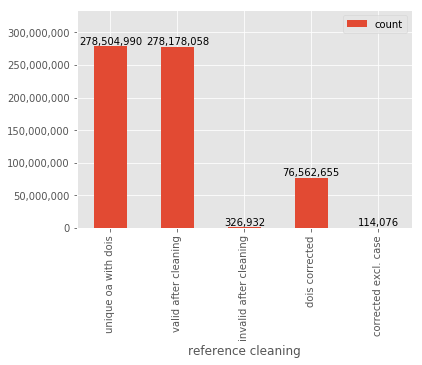

In [7]:
num_unique_oa_with_dois = df_citations['cited_doi_valid']['count']
num_cited_doi_corrected = df_citations['cited_doi_corrected']['count_non_zero']
num_cited_doi_not_corrected = df_citations['cited_doi_corrected']['count_zero']
#num_doi_same_case_insensitve = df_citations['doi_same_case_insensitve']['count_non_zero']
num_corrected_doi_same_case_insensitve = int(df_citations['doi_corrected_equal_case_insensitve']['count_non_zero'])
print('num_cited_doi_not_corrected:', num_cited_doi_not_corrected)
print('num_corrected_doi_same_case_insensitve:', num_corrected_doi_same_case_insensitve)
show_counts([
    ['unique oa with dois', num_unique_oa_with_dois],
    ['valid after cleaning', df_citations['cited_doi_valid']['count_non_zero']],
    ['invalid after cleaning', num_unique_oa_with_dois - df_citations['cited_doi_valid']['count_non_zero']],
    ['dois corrected', df_citations['cited_doi_corrected']['count_non_zero']],
    ['corrected excl. case', (
        num_cited_doi_corrected - num_corrected_doi_same_case_insensitve
    )]
], 'reference cleaning')